# 워드 클라우드(단어구름) 실습
### amueller의 wordcloud package를 이용한 mask를 활용한 wordcloud 만들기! [참고](https://github.com/kimyoungjin06/wordcloud/blob/master/Make_the_Word_Cloud.ipynb)

## 1. Package import & font, mask, message setup!

- 이 코드는 mask를 다루는 부분, font를 다루는 부분, word를 다루는 부분으로 나뉜다. 먼저 필요한 패키지들을 불러오는데, numpy와 random, palettable은 font 색 설정할 때, PIL은 mask 이미지를 처리할 때, wordcloud는 이 모든 것을 이용해서 word cloud를 그릴 때 이용된다.

- 아래에서 딱히 어려운 점은 없고, color_func가 여기서는 Dark2_8이라는 palette를 이용해서 색을 만들어낸다. Palette를 바꾸고 싶다면 이 부분을 바꾸면 될 것!

- *PIL은 python3에서는 Pillow로 설치하고 PIL로 사용하면 된다.

- *mask로 쓸 이미지는 png파일로 우리가 단어를 배치할 공간만 그림이 존재해야 한다. 나머지 공간엔 흰색이 아니라 아예 이미지가 없는 png파일이 필요하다.

In [1]:
## 오류가 나면 모듈을 설치해야 합니다.
## 아마도 아래와 같은 모듈 오류가 있을 겁니다.
# wordcloud 오류, palettable 오류
# 아래 명령어를 복사해서 anaconda prompt에서 수행하세요.
# conda install -c conda-forge wordcloud
# pip install palettable\

import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# color_func 함수, Dark2_8이라는 pallette를 이용하여 색을 만들어냄.
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

# 한글 폰트 지정
font = "NanumPen"
font_path = "%s.ttf" % font

# 아이콘 지정
icon = "Korea" 
icon_path = "%s.png" % icon

### 데이터 입력

#### 데이터 전처리: 
- [트립어드바이저](https://www.tripadvisor.co.kr/Attraction_Review-g294197-d324888-Reviews-Gyeongbokgung_Palace-Seoul.html) 사이트에서 ‘경복궁’, ‘홍대’, ‘명동’ 등 국내 인기 명소를 다녀온 외국인 여행객의 리뷰 댓글을 취합하여 데이터 가공

In [3]:
#-*- coding: utf-8 -*-
f = open("review.txt", 'r', encoding='euc-kr')
message_of_moon = f.read()
print(message_of_moon)
f.close()

경복궁은 유명한 관광명소라서 외국인들과 한국인 관광객들이 수시로 드나든다. 그래서 그런지 북적북적 하는데 막상 안에서 들어가보면 볼게 그다지 많다고 느껴지지는 않는다. 물론 여러가지 건물들이 있고 그 건물들이 각자의 역할을 하는게 설명이 되어 있지만 와닿지는 않는다. 입장료를 5천원 정도로 받고 각자의 건물에다가 밀랍인형이나 아니면 더 설명을 원할히 할 수 있게 미니어처를 제작하던지 다른 요소를 추가하면 좋을 듯 싶다.

전통과 어우러진 음악과 조명이 인상깊었다. 모든 감각을 즐겁게 해 준 보석같은 행사같다. 매년 야간개장 티켓을 구하기 어려운 이유를 알겠다.늘 서울에 살아서 느낌이 없는 감이 있지만 고층건물 숲과 대비를 이루는 경복궁은 서울의 보물인거 같습니다. 아이 데리고 가기에도 주차장이 궁내에 있어서 편리하구요, 다만 편의시설이 좀더 다양해졌으면 좋겠습니다.경치가 아름다워요
청와대랑 가까운 후문을통해서 관람하는거 추천합니다.아이들에게 역사와 문화를 알게 해주는 중요한 유산인곳같습니다.평일 낮에는 한가로이 구경 가능합니다.
찬찬히 돌아다니며 보면 좋습니다.
한복 입으면 무료입장인데, 한복 입고 사진 찍으면 멋지게 나오는 것 같네요~한복을 입으면 입장료가 무료라 한복을 입고 궁궐 산책을 하는 사람들이 많습니다. 살구꽃, 벚꽃, 미선나무 등 아름다운 꽃들이 궁과 잘 어울립니다.이곳은 역사 그 자체입니다. 그리고 이곳에 얽힌 이야기가 굉장히 많으니 공부를 할때 마다 다르게 보일 겁니다.외국손님이 와서 방문도하고 친구끼리도 가서 산책도하고 언제가도 좋아요~ 관광객이 너무 많을땐 좀 정신없기도하지만 안쪽으로 들어가서 다니다보면 분산돼서 괜찮더라구요. 나와서 삼청동이나 서촌쪽에서 맛난거 먹는것도 덤으로 있구요경복궁 한바퀴 천천히 여유있게 걸으면 마치 내가 왕이 된 느낌이 납니다. 다만 바닥에 모래가 많으니 신발 더럽혀 지지 않도록 조심하세요.특히 야경이 정말 기가 막힙니다. 외국인은 티켓구매할 수있으니 꼭 야경도 구경하세요 도심 속에서 이런 궁을 볼 수 있다는 건 

## 2. Load the mask, font coloring, generate word cloud!
- 먼저 icon에 image를 불러오고, mask를 RGB type으로 icon과 같은 사이즈로 전부 (255,255,255)값 (아마 흰색?)으로 만들어내고, 이 (255,255,255)가 이미지가 채워지지 않는 부분을 의미한다. (?Image.new를 참고!), 그리고 나서 이 mask에 아까 불러온 icon의 형상을 붙여넣는다. 그리고 나서 이를 nparray로 만든다.

- 이제 만들어놓은 mask와 불러놨던 font를 이용하여 WordCloud함수를 이용해 wordcloud를 만들어내고, WordCloud.recolor를 이용해서 아까 만들어놓은 color_func()를 사용해 불러온 palette를 이용해 색을 입힌다. 그리고 저장하면 끝!



# 남북정상회담 두 정상의 대화문 워드 클라우드
[연설문 시각화](https://github.com/eventia/CandSpeech/blob/master/wordcloud.py)

In [4]:
# 전처리
message_of_moon = message_of_moon.split('\n\n')
message_of_moon

['경복궁은 유명한 관광명소라서 외국인들과 한국인 관광객들이 수시로 드나든다. 그래서 그런지 북적북적 하는데 막상 안에서 들어가보면 볼게 그다지 많다고 느껴지지는 않는다. 물론 여러가지 건물들이 있고 그 건물들이 각자의 역할을 하는게 설명이 되어 있지만 와닿지는 않는다. 입장료를 5천원 정도로 받고 각자의 건물에다가 밀랍인형이나 아니면 더 설명을 원할히 할 수 있게 미니어처를 제작하던지 다른 요소를 추가하면 좋을 듯 싶다.',
 '전통과 어우러진 음악과 조명이 인상깊었다. 모든 감각을 즐겁게 해 준 보석같은 행사같다. 매년 야간개장 티켓을 구하기 어려운 이유를 알겠다.늘 서울에 살아서 느낌이 없는 감이 있지만 고층건물 숲과 대비를 이루는 경복궁은 서울의 보물인거 같습니다. 아이 데리고 가기에도 주차장이 궁내에 있어서 편리하구요, 다만 편의시설이 좀더 다양해졌으면 좋겠습니다.경치가 아름다워요\n청와대랑 가까운 후문을통해서 관람하는거 추천합니다.아이들에게 역사와 문화를 알게 해주는 중요한 유산인곳같습니다.평일 낮에는 한가로이 구경 가능합니다.\n찬찬히 돌아다니며 보면 좋습니다.\n한복 입으면 무료입장인데, 한복 입고 사진 찍으면 멋지게 나오는 것 같네요~한복을 입으면 입장료가 무료라 한복을 입고 궁궐 산책을 하는 사람들이 많습니다. 살구꽃, 벚꽃, 미선나무 등 아름다운 꽃들이 궁과 잘 어울립니다.이곳은 역사 그 자체입니다. 그리고 이곳에 얽힌 이야기가 굉장히 많으니 공부를 할때 마다 다르게 보일 겁니다.외국손님이 와서 방문도하고 친구끼리도 가서 산책도하고 언제가도 좋아요~ 관광객이 너무 많을땐 좀 정신없기도하지만 안쪽으로 들어가서 다니다보면 분산돼서 괜찮더라구요. 나와서 삼청동이나 서촌쪽에서 맛난거 먹는것도 덤으로 있구요경복궁 한바퀴 천천히 여유있게 걸으면 마치 내가 왕이 된 느낌이 납니다. 다만 바닥에 모래가 많으니 신발 더럽혀 지지 않도록 조심하세요.특히 야경이 정말 기가 막힙니다. 외국인은 티켓구매할 수있으니 꼭 야경도 구경하세요 도심 속에서 이런 궁을 볼 

In [5]:
# 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus1 = tf_vectorizer.fit(message_of_moon)
tf_bow1 = tf_vectorizer.fit_transform(message_of_moon)
tf_bow1

<3x754 sparse matrix of type '<class 'numpy.int64'>'
	with 767 stored elements in Compressed Sparse Row format>

In [6]:
# check vocabulary in TDM
print(len(tf_corpus1.vocabulary_))
print(len(tf_corpus1.get_feature_names()))
tf_vectorizer.get_feature_names()

754
754


['20대',
 '25세',
 '5천원',
 'x규모가',
 'ㅋㅋ역동적이고',
 'ㅋ젊음의거리라는',
 '華爲라는',
 '가게가',
 '가격과',
 '가격이',
 '가고',
 '가기',
 '가기에도',
 '가까운',
 '가까워',
 '가는',
 '가능하다면',
 '가능합니다',
 '가면',
 '가볍게',
 '가보면',
 '가보세요',
 '가서',
 '가수들을',
 '가시길',
 '가야',
 '가장',
 '가지말자',
 '각자의',
 '각종',
 '간격이',
 '간식과',
 '간식들도',
 '갈때마다',
 '갈릴',
 '감각을',
 '감동이',
 '감이',
 '같네요',
 '같습니다',
 '같은',
 '거닐면',
 '거리',
 '거리라',
 '거리라는',
 '거리에서',
 '거리에선',
 '거의',
 '거주하지',
 '건물들이',
 '건물에다가',
 '걷기',
 '걸림',
 '걸어가면',
 '걸으면',
 '겁니다',
 '것도',
 '것을',
 '것이라고',
 '겨우',
 '겹쳐서',
 '겹친다거나',
 '경복궁',
 '경복궁은',
 '경복궁이랑은',
 '경우',
 '경의선숲길',
 '경주',
 '경치가',
 '경회루가',
 '경희궁',
 '고궁이',
 '고층건물',
 '골목들이',
 '곳곳에',
 '곳도',
 '곳수많은',
 '곳에',
 '곳이',
 '곳이네요',
 '곳이에요',
 '공부를',
 '공연',
 '공연도',
 '공연들이',
 '공원에서',
 '관광객들이',
 '관광객이',
 '관광명소',
 '관광명소라서',
 '관광코스',
 '관람객들의',
 '관람하는거',
 '괘안음안가본',
 '괜찮더라구요',
 '굉장히',
 '구경',
 '구경은',
 '구경하기',
 '구경하세요',
 '구경할',
 '구하기',
 '구했습니다',
 '궁과',
 '궁궐',
 '궁내에',
 '궁을',
 '그냥',
 '그늘이',
 '그다지',
 '그닥입니다',
 '그때',
 '그래도',
 '그래서',
 '그런지',
 '그리고',
 '그만큼사람이많지만',
 '근데',
 '근처에',
 

In [7]:
# frequency count
tf_word_sum1 = tf_bow1.toarray().sum(axis=0)
tf_word_name1 = tf_corpus1.get_feature_names()
tf_word_dict1 = {}

for i in range(len(tf_word_sum1)):
    tf_word_dict1[tf_word_name1[i]] = tf_word_sum1[i]
    
print(tf_corpus1.get_feature_names())
tf_word_sum1

['20대', '25세', '5천원', 'x규모가', 'ㅋㅋ역동적이고', 'ㅋ젊음의거리라는', '華爲라는', '가게가', '가격과', '가격이', '가고', '가기', '가기에도', '가까운', '가까워', '가는', '가능하다면', '가능합니다', '가면', '가볍게', '가보면', '가보세요', '가서', '가수들을', '가시길', '가야', '가장', '가지말자', '각자의', '각종', '간격이', '간식과', '간식들도', '갈때마다', '갈릴', '감각을', '감동이', '감이', '같네요', '같습니다', '같은', '거닐면', '거리', '거리라', '거리라는', '거리에서', '거리에선', '거의', '거주하지', '건물들이', '건물에다가', '걷기', '걸림', '걸어가면', '걸으면', '겁니다', '것도', '것을', '것이라고', '겨우', '겹쳐서', '겹친다거나', '경복궁', '경복궁은', '경복궁이랑은', '경우', '경의선숲길', '경주', '경치가', '경회루가', '경희궁', '고궁이', '고층건물', '골목들이', '곳곳에', '곳도', '곳수많은', '곳에', '곳이', '곳이네요', '곳이에요', '공부를', '공연', '공연도', '공연들이', '공원에서', '관광객들이', '관광객이', '관광명소', '관광명소라서', '관광코스', '관람객들의', '관람하는거', '괘안음안가본', '괜찮더라구요', '굉장히', '구경', '구경은', '구경하기', '구경하세요', '구경할', '구하기', '구했습니다', '궁과', '궁궐', '궁내에', '궁을', '그냥', '그늘이', '그다지', '그닥입니다', '그때', '그래도', '그래서', '그런지', '그리고', '그만큼사람이많지만', '근데', '근처에', '글쎄', '급하게', '기가', '기념품', '길거리', '길거리음식', '길에는', '까페들을', '깨긋하며', '꽃들이', '나네요', '나들이가듯이', '나머진', '나오는', '나와서', '나을', '나중

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 5, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 3, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 7, 1, 1, 3, 4, 1, 1, 2, 4, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 3, 2, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [8]:

# 단어별 글자수 확인
tf_word_dict1

{'20대': 1,
 '25세': 1,
 '5천원': 1,
 'x규모가': 1,
 'ㅋㅋ역동적이고': 1,
 'ㅋ젊음의거리라는': 1,
 '華爲라는': 1,
 '가게가': 1,
 '가격과': 1,
 '가격이': 1,
 '가고': 1,
 '가기': 1,
 '가기에도': 1,
 '가까운': 2,
 '가까워': 1,
 '가는': 3,
 '가능하다면': 1,
 '가능합니다': 1,
 '가면': 2,
 '가볍게': 1,
 '가보면': 1,
 '가보세요': 1,
 '가서': 2,
 '가수들을': 1,
 '가시길': 1,
 '가야': 2,
 '가장': 1,
 '가지말자': 1,
 '각자의': 2,
 '각종': 1,
 '간격이': 1,
 '간식과': 1,
 '간식들도': 1,
 '갈때마다': 1,
 '갈릴': 1,
 '감각을': 1,
 '감동이': 1,
 '감이': 1,
 '같네요': 3,
 '같습니다': 1,
 '같은': 1,
 '거닐면': 1,
 '거리': 1,
 '거리라': 1,
 '거리라는': 1,
 '거리에서': 2,
 '거리에선': 1,
 '거의': 1,
 '거주하지': 1,
 '건물들이': 2,
 '건물에다가': 1,
 '걷기': 1,
 '걸림': 1,
 '걸어가면': 1,
 '걸으면': 1,
 '겁니다': 1,
 '것도': 2,
 '것을': 1,
 '것이라고': 1,
 '겨우': 1,
 '겹쳐서': 1,
 '겹친다거나': 1,
 '경복궁': 1,
 '경복궁은': 2,
 '경복궁이랑은': 1,
 '경우': 1,
 '경의선숲길': 1,
 '경주': 1,
 '경치가': 1,
 '경회루가': 1,
 '경희궁': 1,
 '고궁이': 1,
 '고층건물': 1,
 '골목들이': 1,
 '곳곳에': 1,
 '곳도': 1,
 '곳수많은': 1,
 '곳에': 1,
 '곳이': 2,
 '곳이네요': 1,
 '곳이에요': 2,
 '공부를': 1,
 '공연': 1,
 '공연도': 5,
 '공연들이': 1,
 '공원에서': 1,
 '관광객들이': 1,
 '관광객이': 1,
 '관광명소

### 시각화

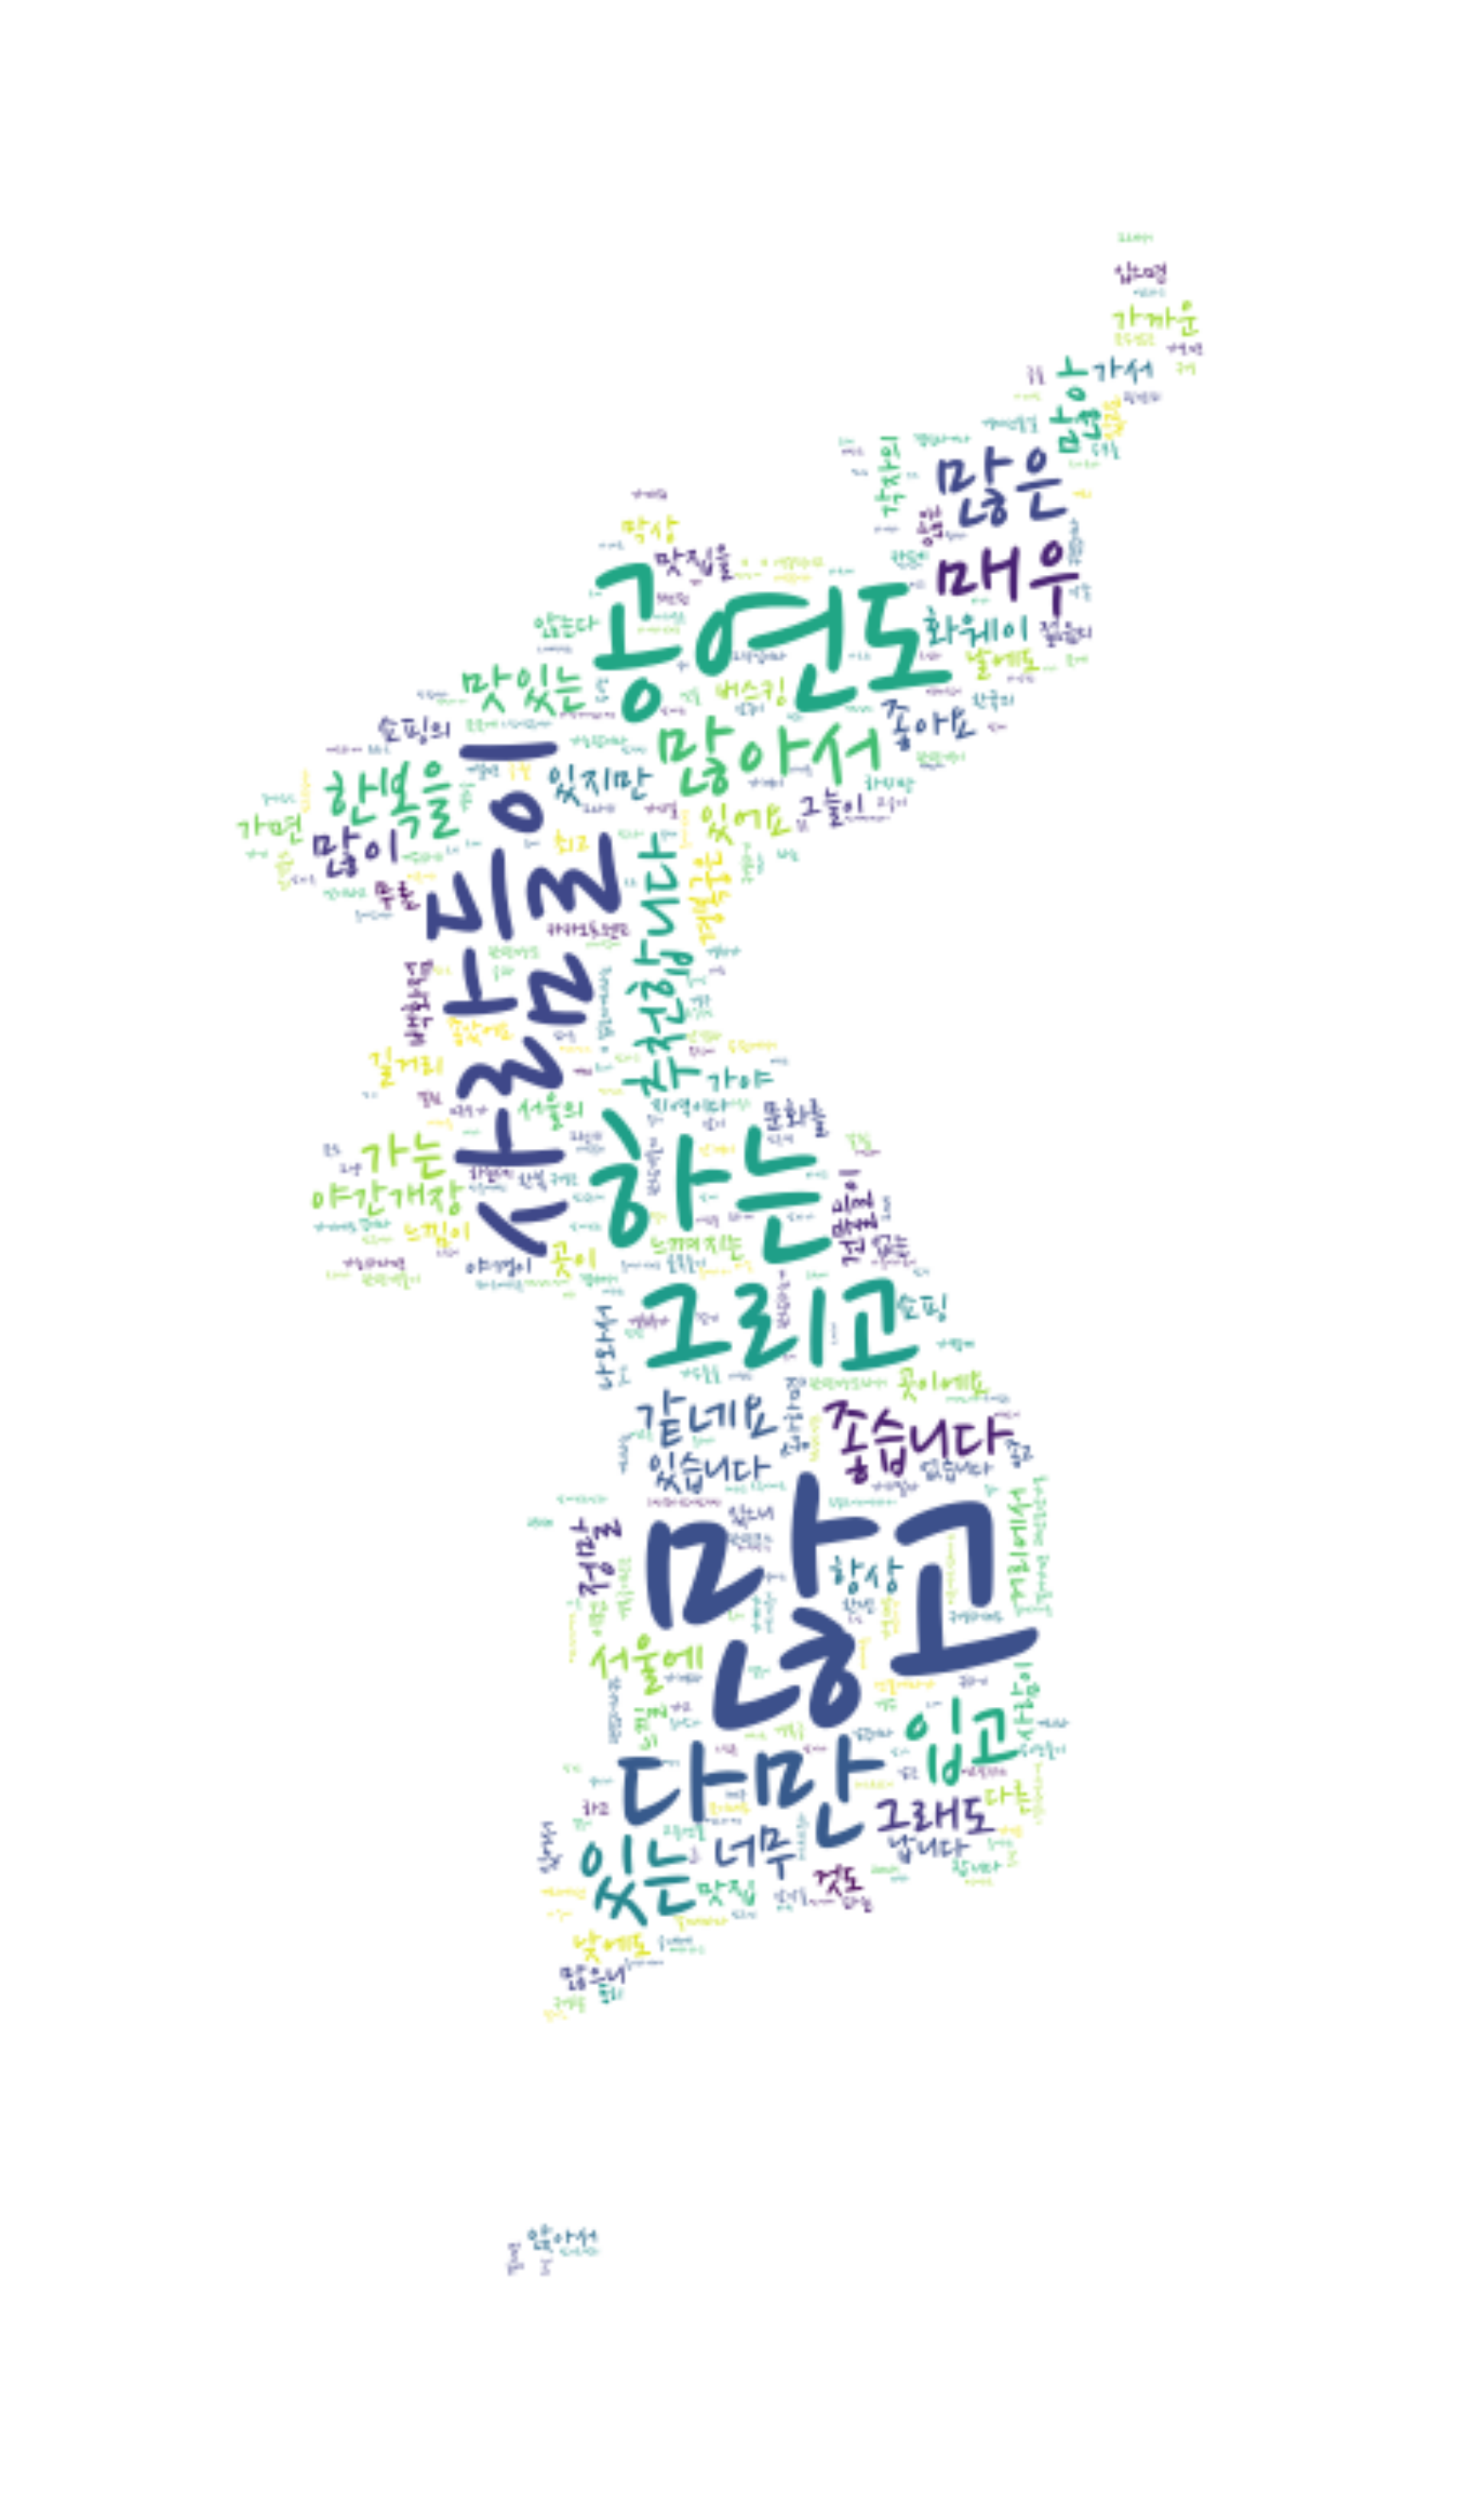

In [9]:
# 외국인 관광객 리뷰
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict1)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("Forigner.png") # 그림파일로 추출하기

### 결과 분석
- 국내 인기 관광 명소를 다녀온 외국인 관광객들은 ‘공연도’, ‘많고’, ‘사람들이’, ‘추천합니다’, ‘한복을’, ‘매우’, ‘많은’ 등의 댓글을 주로 작성하며 국내여행에 대해 긍정적인 반응을 보였다.